# Практическая работа 2. Источники данных. Извлечение данных
# Упражнение 2 Вариант 2

ФИО: Аросев Максим Георгивич

Группа: БД-231м

## Задание 2.3. Выполнить парсинг коллекции данных на Портале открытых данных Правительства Москвы

[Велосипедные парковки](https://data.mos.ru/opendata/916?pageSize=10&pageIndex=0&isDynamic=false)

In [2]:
# Импорт стандартных пакетов
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint
from bs4 import BeautifulSoup as bso

# Для выполнения операций с регулярными выражениями
import re

In [3]:
import requests

url = 'https://apidata.mos.ru/v1/datasets/916/features?api_key=22de8170-185c-4df6-a56e-1fe3dd1bdab4'
headers = {'Accept': 'application/json'}

response = requests.get(url, headers=headers)

In [4]:
print(f"URL: \n\t {response.url}")

URL: 
	 https://apidata.mos.ru/v1/datasets/916/features?api_key=22de8170-185c-4df6-a56e-1fe3dd1bdab4


In [5]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 application/json


In [6]:
if response.status_code == 200:
    json_data = response.json()  # Преобразуем JSON-ответ в словарь Python

    features = json_data['features']

    # Создаем датафрейм из полученных данных
    df = pd.json_normalize(features)
else:
    print('Запрос вернул статус:', response.status_code)

In [7]:
df

,type,geometry.coordinates,geometry.type,properties.datasetId,properties.attributes.is_deleted,properties.attributes.ID,properties.attributes.Name,properties.attributes.global_id,properties.attributes.Photo,properties.attributes.AdmArea,...,properties.attributes.DepartmentalAffiliation,properties.attributes.Address,properties.attributes.Capacity,properties.attributes.ObjectOperOrgName,properties.attributes.ObjectOperOrgPhone,properties.attributes.Longitude_WGS84,properties.attributes.Latitude_WGS84,properties.rowId,properties.releaseNumber,properties.versionNumber
0,Feature,"[37.650781, 55.889628]",Point,916,0,32,Велосипедная парковка № 37124 «Гимназия № 1506»,2757725,4b2327b3-55af-4ff1-ab55-786c1d199557,Северо-Восточный административный округ,...,Департамент транспорта и развития дорожно-тран...,"Широкая улица, дом 1А",10,ГКУ Центр организации дорожного движения Прави...,"[{'is_deleted': 0, 'OperationOrganizationPhone...",37.650781,55.889628,None,17,7
1,Feature,"[37.570777, 55.896533]",Point,916,0,35,Велосипедная парковка № 37018 «Школа здоровья ...,2757728,87a68eb2-aa64-47e7-8970-998244ba36bd,Северо-Восточный административный округ,...,Департамент транспорта и развития дорожно-тран...,"Череповецкая улица, дом 10А",10,ГКУ Центр организации дорожного движения Прави...,"[{'is_deleted': 0, 'OperationOrganizationPhone...",37.570777,55.896533,None,17,7
2,Feature,"[37.612922, 55.857407]",Point,916,0,36,Велосипедная парковка № 37106 «Центр образован...,2757729,da0d57c7-03f4-47d7-b7e6-291d87f517bd,Северо-Восточный административный округ,...,Департамент транспорта и развития дорожно-тран...,"Отрадная улица, дом 11А",10,ГКУ Центр организации дорожного движения Прави...,"[{'is_deleted': 0, 'OperationOrganizationPhone...",37.612922,55.857407,None,17,7
3,Feature,"[37.613732, 55.856873]",Point,916,0,38,Велосипедная парковка № 37017 «Школа № 263»,2757731,21da1cde-ed77-4508-880a-bf29ff90db84,Северо-Восточный административный округ,...,Департамент транспорта и развития дорожно-тран...,"Отрадная улица, дом 11Б",10,ГКУ Центр организации дорожного движения Прави...,"[{'is_deleted': 0, 'OperationOrganizationPhone...",37.613732,55.856873,None,17,7
4,Feature,"[37.604736, 55.859911]",Point,916,0,40,Велосипедная парковка № 37061 «Школа № 950»,2757733,9e8b9d52-6939-478e-ae10-20dd9dffd969,Северо-Восточный административный округ,...,Департамент транспорта и развития дорожно-тран...,"Отрадная улица, дом 1А",10,ГКУ Центр организации дорожного движения Прави...,"[{'is_deleted': 0, 'OperationOrganizationPhone...",37.604736,55.859911,None,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Feature,"[37.69764, 55.861458]",Point,916,0,3173,Велосипедная парковка № 110136014310,2373403385,ddadf926-87d5-4791-b668-59597f8a865b,Северо-Восточный административный округ,...,Департамент транспорта и развития дорожно-тран...,"улица Внешних Вод, дом 10, строение 7",8,ГКУ Центр организации дорожного движения Прави...,"[{'is_deleted': 0, 'OperationOrganizationPhone...",37.697640,55.861458,None,17,7
996,Feature,"[37.59859, 55.774584]",Point,916,0,3174,Велосипедная парковка № 110136014311,2373403386,ad466af7-acae-4bb6-ab8d-afb310e18f5b,Центральный административный округ,...,Департамент транспорта и развития дорожно-тран...,"улица Фадеева, дом 5",2,ГКУ Центр организации дорожного движения Прави...,"[{'is_deleted': 0, 'OperationOrganizationPhone...",37.598590,55.774584,None,17,7
997,Feature,"[37.566961, 55.881589]",Point,916,0,3175,Велосипедная парковка № 110136014312,2373403388,acd05c35-82a5-4031-8f21-e4aa42b5bcb6,Северный административный округ,...,Департамент транспорта и развития дорожно-тран...,"Керамический проезд, дом 6А",6,ГКУ Центр организации дорожного движения Прави...,"[{'is_deleted': 0, 'OperationOrganizationPhone...",37.566961,55.881589,None,17,7
998,Feature,"[37.567231, 55.882566]",Point,916,0,3176,Велосипедная парковка № 110136014313,2373403389,f99131e0-7084-47e7-be6f-4827da2f43aa,Северный административный округ,...,

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   type                                           1000 non-null   object
 1   geometry.coordinates                           1000 non-null   object
 2   geometry.type                                  1000 non-null   object
 3   properties.datasetId                           1000 non-null   int64 
 4   properties.attributes.is_deleted               1000 non-null   int64 
 5   properties.attributes.ID                       1000 non-null   int64 
 6   properties.attributes.Name                     1000 non-null   object
 7   properties.attributes.global_id                1000 non-null   int64 
 8   properties.attributes.Photo                    1000 non-null   object
 9   properties.attributes.AdmArea                  1000 non-null   o

In [9]:
df = df.drop(columns=df.columns[:3])
df = df.iloc[:, :-4]

In [10]:
df.rename(columns=lambda x: x.replace('properties.attributes.', ''), inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   properties.datasetId     1000 non-null   int64 
 1   is_deleted               1000 non-null   int64 
 2   ID                       1000 non-null   int64 
 3   Name                     1000 non-null   object
 4   global_id                1000 non-null   int64 
 5   Photo                    1000 non-null   object
 6   AdmArea                  1000 non-null   object
 7   District                 1000 non-null   object
 8   DepartmentalAffiliation  1000 non-null   object
 9   Address                  1000 non-null   object
 10  Capacity                 1000 non-null   int64 
 11  ObjectOperOrgName        1000 non-null   object
 12  ObjectOperOrgPhone       1000 non-null   object
 13  Longitude_WGS84          1000 non-null   object
dtypes: int64(5), object(9)
memory usage: 109.

In [12]:
df.head(3)

,properties.datasetId,is_deleted,ID,Name,global_id,Photo,AdmArea,District,DepartmentalAffiliation,Address,Capacity,ObjectOperOrgName,ObjectOperOrgPhone,Longitude_WGS84
0,916,0,32,Велосипедная парковка № 37124 «Гимназия № 1506»,2757725,4b2327b3-55af-4ff1-ab55-786c1d199557,Северо-Восточный административный округ,район Северное Медведково,Департамент транспорта и развития дорожно-тран...,"Широкая улица, дом 1А",10,ГКУ Центр организации дорожного движения Прави...,"[{'is_deleted': 0, 'OperationOrganizationPhone...",37.650781
1,916,0,35,Велосипедная парковка № 37018 «Школа здоровья ...,2757728,87a68eb2-aa64-47e7-8970-998244ba36bd,Северо-Восточный административный округ,район Лианозово,Департамент транспорта и развития дорожно-тран...,"Череповецкая улица, дом 10А",10,ГКУ Центр организации дорожного движения Прави...,"[{'is_deleted': 0, 'OperationOrganizationPhone...",37.570777
2,916,0,36,Велосипедная парковка № 37106 «Центр образован...,2757729,da0d57c7-03f4-47d7-b7e6-291d87f517bd,Северо-Восточный административный округ,район Отрадное,Департамент транспорта и развития дорожно-тран...,"Отрадная улица, дом 11А",10,ГКУ Центр организации дорожного движения Прави...,"[{'is_deleted': 0, 'OperationOrganizationPhone...",37.612922


Распределение вместимости велопарковок


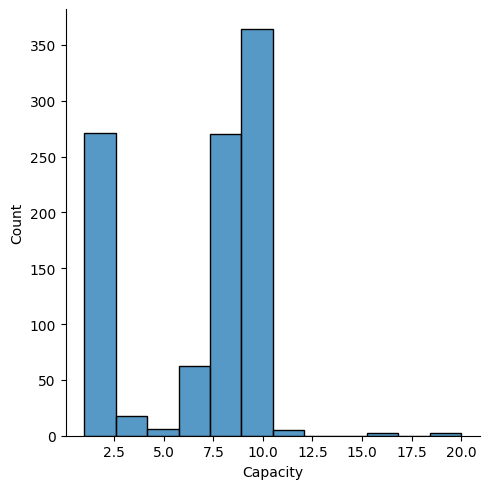

In [13]:
print('Распределение вместимости велопарковок')
sns.displot(df['Capacity'])

In [14]:
print('Топ 5 самых вместительных велопарковок')
df[['Name', 'Capacity']].sort_values(by = 'Capacity', ascending = False).head(5)

Топ 5 самых вместительных велопарковок


,Name,Capacity
844,Велосипедная парковка № 080000112740,20
977,Велосипедная парковка № 110136014292,20
828,Велосипедная парковка № 800000113546,16
978,Велосипедная парковка № 110136014293,16
983,Велосипедная парковка № 110136014298,12


Сколько велодорожек в каждом округе


<Axes: >

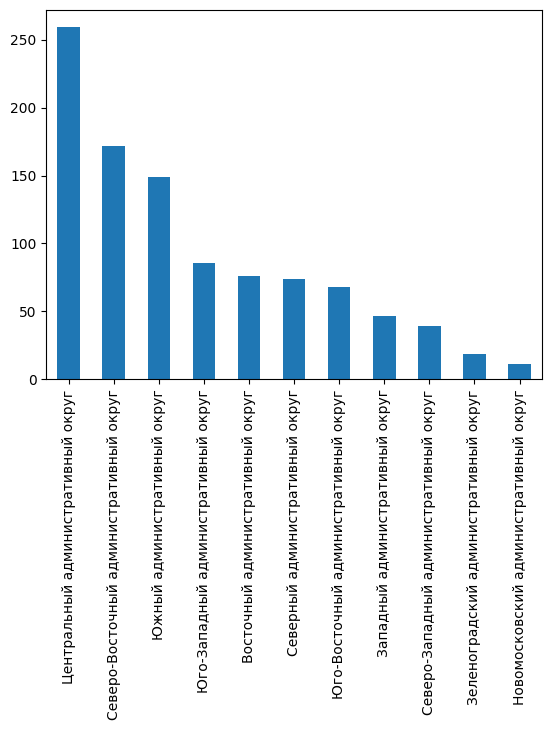

In [18]:
name_counts = df['AdmArea'].value_counts()
print("Сколько велодорожек в каждом округе")
name_counts.plot(kind='bar')
